In [1]:
# import library
import numpy as np
import pandas as pd
import datetime as dt

#For Data  Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For Machine Learning Algorithm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("C:/Users/clinic/Downloads/Data analyst Task-Question 1 Info.csv")

In [10]:
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,InvoiceMonth,CohortMonth
0,1,1,2021-04-12,10000,1.0,12000,2021-04-01,2021-04-01
1,2,2,2021-05-09,0,0.0,20000,2021-05-01,2021-05-01
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01,2021-05-01
3,4,4,2021-11-10,0,0.0,15000,2021-11-01,2021-11-01
4,5,5,2021-11-10,10000,1.0,16000,2021-11-01,2021-11-01


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29057 entries, 0 to 29056
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_id       29057 non-null  int64         
 1   user_id        29057 non-null  int64         
 2   created_at     29057 non-null  datetime64[ns]
 3   discount_cost  29057 non-null  int64         
 4   discount_type  29057 non-null  float64       
 5   basket         29057 non-null  int64         
 6   InvoiceMonth   29057 non-null  datetime64[ns]
 7   CohortMonth    29057 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(4)
memory usage: 2.0 MB


In [12]:
df['created_at'] = pd.to_datetime(df['created_at'], format = '%m/%d/%Y')

In [13]:
df['discount_type'].fillna(0, inplace=True)
df = df.dropna(subset=['user_id'])
df = df.drop_duplicates()

In [14]:
df.dtypes

order_id                  int64
user_id                   int64
created_at       datetime64[ns]
discount_cost             int64
discount_type           float64
basket                    int64
InvoiceMonth     datetime64[ns]
CohortMonth      datetime64[ns]
dtype: object

In [15]:
df.head()

,order_id,user_id,created_at,discount_cost,discount_type,basket,InvoiceMonth,CohortMonth
0,1,1,2021-04-12,10000,1.0,12000,2021-04-01,2021-04-01
1,2,2,2021-05-09,0,0.0,20000,2021-05-01,2021-05-01
2,3,3,2021-05-09,10000,1.0,14000,2021-05-01,2021-05-01
3,4,4,2021-11-10,0,0.0,15000,2021-11-01,2021-11-01
4,5,5,2021-11-10,10000,1.0,16000,2021-11-01,2021-11-01


In [18]:
df.duplicated().sum()

0

In [19]:
df = df.drop_duplicates()
df.describe()

,order_id,user_id,discount_cost,discount_type,basket
count,29057.000000,29057.000000,29057.000000,29057.000000,29057.000000
mean,14529.000000,3992.421964,2502.059400,0.243074,24273.981313
std,8388.177722,2679.813539,4810.161443,0.439880,17012.448842
min,1.000000,1.000000,0.000000,0.000000,4000.000000
25%,7265.000000,1715.000000,0.000000,0.000000,13000.000000
50%,14529.000000,3666.000000,0.000000,0.000000,20000.000000
75%,21793.000000,6051.000000,0.000000,0.000000,30000.000000
max,29057.000000,9985.000000,40000.000000,2.000000,337500.000000


In [20]:
df=df[(df['order_id']>0) & (df['discount_cost']>0)]

In [21]:
def get_month(x):
    return dt.datetime(x.year, x.month, 1)

df['InvoiceMonth'] = df['created_at'].apply(get_month)
grouping = df.groupby('user_id')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

In [22]:
def get_month_int(dframe, column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month, day

invoice_year, invoice_month, _ = get_month_int(df, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_month_int(df, 'CohortMonth')

year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month

df['CohortIndex'] = year_diff * 12 + month_diff + 1

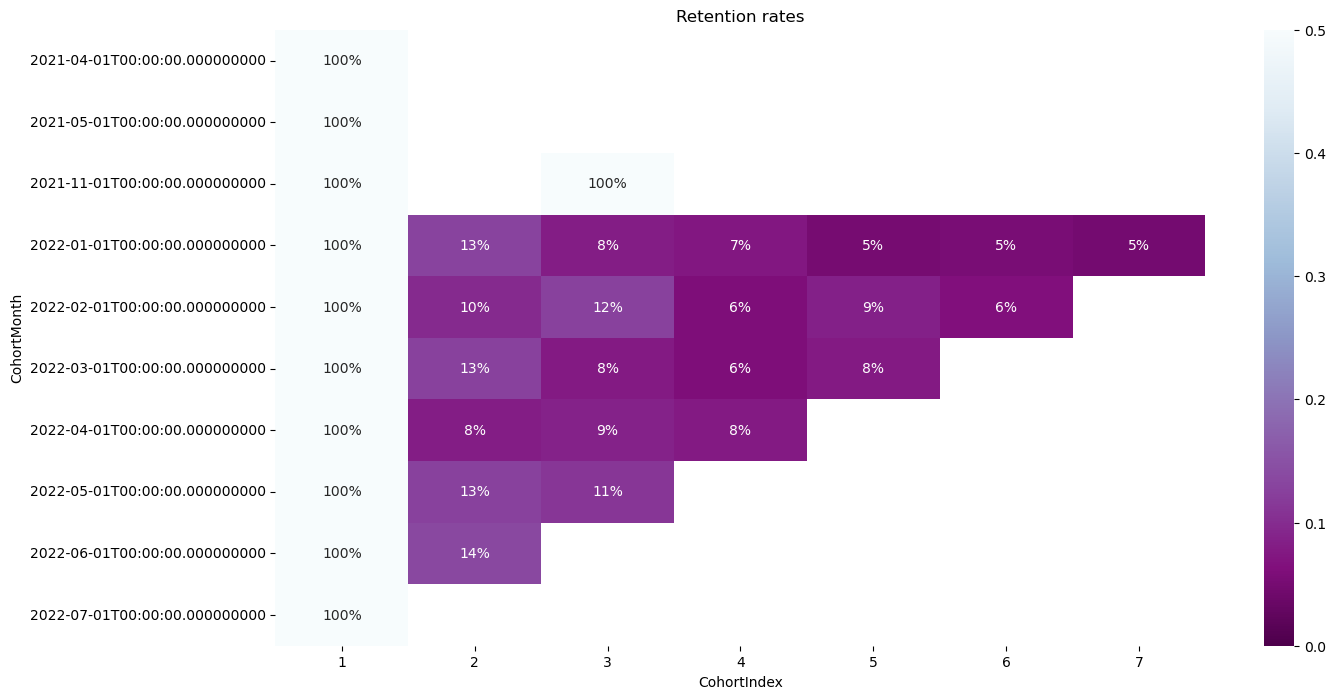

In [23]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['user_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='user_id')

cohort_size = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_size, axis=0)
retention.round(3) * 100

plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', vmin=0.0, vmax=0.5, cmap="BuPu_r")
plt.show()

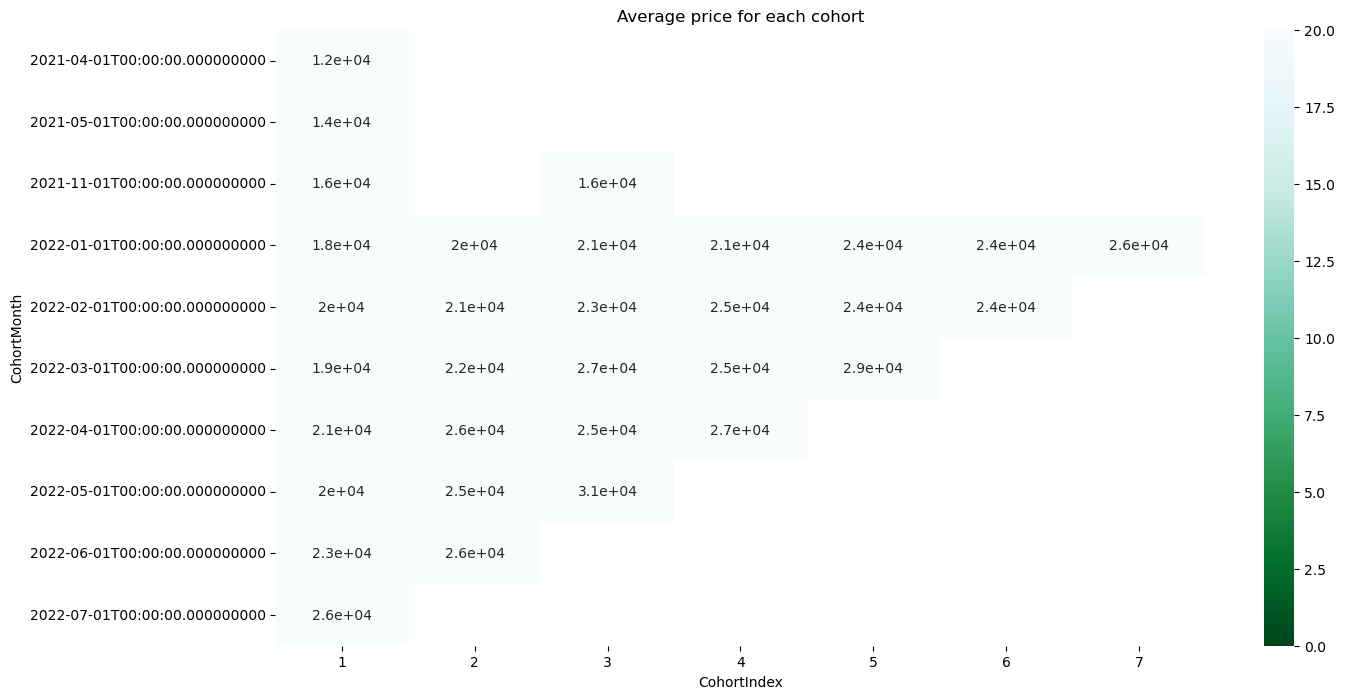

In [24]:
grouping = df.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['basket'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='basket')
average_quantity.round(1)

plt.figure(figsize=(15, 8))
plt.title('Average price for each cohort')
sns.heatmap(data=average_quantity, annot=True, vmin=0.0, vmax=20, cmap="BuGn_r")
plt.show()

In [44]:
# Function to extract month and year from a datetime
def get_month(x): return dt.datetime(x.year, x.month, 1)

In [45]:
# Create InvoiceMonth column
df['InvoiceMonth'] = df['created_at'].apply(get_month)

In [46]:
# Create CohortMonth column
grouping = df.groupby('user_id')['InvoiceMonth']
df['CohortMonth'] = grouping.transform('min')

In [47]:
# Extract data for new users in July 2022
new_users_july_2022 = df[(df['CohortMonth'] == pd.Timestamp('2022-07-01'))]# Extract data for new users in July 2022
new_users_july_2022 = df[(df['CohortMonth'] == pd.Timestamp('2022-07-01'))]

In [48]:
# Filter data for August 2022
august_2022_data = new_users_july_2022[new_users_july_2022['created_at'].dt.month == 8]

In [53]:
# Check the data
print(f"Number of orders in August 2022: {august_2022_data.shape[0]}")
print(august_2022_data)

Number of orders in August 2022: 0
Empty DataFrame
Columns: [order_id, user_id, created_at, discount_cost, discount_type, basket, InvoiceMonth, CohortMonth, CohortIndex]
Index: []


In [54]:
# Extract year and month for easier filtering
df['year_month'] = df['created_at'].dt.to_period('M')

In [55]:
# Filter data to get new users for each month
cohort_new_users = df.groupby('CohortMonth')['user_id'].nunique().reset_index()
cohort_new_users.columns = ['CohortMonth', 'NewUsers']

In [56]:
# Initialize an empty list to store monthly orders
monthly_orders = []

In [58]:
# Iterate through each cohort month to calculate the average monthly orders in the following month
for cohort_month in cohort_new_users['CohortMonth']:
    next_month = cohort_month + pd.offsets.MonthBegin(1)
    monthly_order_count = df[(df['CohortMonth'] == cohort_month) & (df['InvoiceMonth'] == next_month)].shape[0]
    monthly_orders.append(monthly_order_count)#نمایش مقادیر به صورت درصد

In [59]:
# Calculate the average monthly orders for new users
average_monthly_orders = np.mean(monthly_orders)

In [60]:
print(f'Predicted number of orders for new users of July 2022 in August: {average_monthly_orders:.0f}')

Predicted number of orders for new users of July 2022 in August: 61
